# 📚**1.Introduction**

In the realm of Natural Language Processing (NLP), the task of summarizing extensive or multiple documents often presents a formidable challenge. The sheer volume of data can lead to slower processing times and memory constraints, sometimes necessitating substantial investments in high-performance computing infrastructure. However, a new solution has emerged with Langchain, offering an innovative approach to this issue by breaking down large documents into smaller, more manageable chunks. By employing either simultaneous or serial processing, depending on the chosen chain type, Langchain effectively eliminates the burden of dealing with the maximum token issue.

Beyond the challenges of handling vast amounts of information, the process of combining insights from multiple documents to create a cohesive summary can be equally daunting. Discrepancies in terminology, conflicting data, and variations in the aspects of the topic can hinder the effective fusion of content. Fortunately, Langchain steps in to address these complexities. By storing relevant information from previous documents within the current one, it establishes a comprehensive chain of interconnected documents. This intelligent approach empowers NLP summarization models to contextualize information, substantiate its importance, and maintain the proper order of sentences in the summarized content.

In this tutorial, we will delve deeper into the groundbreaking capabilities of Langchain, exploring how it revolutionizes NLP summarization. As part of the tutorial, we will develop a summarization app to showcase the power of LangChain in summarizing the contents of PDF documents.

# 📌**2. Setting up the Environment**

In [1]:
%%capture
!pip install tiktoken openai langchain

In [2]:
from langchain import OpenAI, PromptTemplate, LLMChain
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import MapReduceDocumentsChain, ReduceDocumentsChain
from langchain.chains.mapreduce import MapReduceChain
from langchain.chains import ReduceDocumentsChain
from langchain.chains.combine_documents.stuff import StuffDocumentsChain
from langchain.document_loaders import WebBaseLoader
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.chains.summarize import load_summarize_chain
import textwrap

# 📌**3. Initialize OpenAi Key**

In [3]:
import os
os.environ["OPENAI_API_KEY"] = "secret_key"

# 📌**4. Summarization Chain Setup**

In [4]:
model_name = "gpt-3.5-turbo-16k"
temperature = 0.1

In [5]:
llm = ChatOpenAI(model_name=model_name, temperature=temperature)

# 📌**5. Upload Document**

In [6]:
loader = WebBaseLoader("https://simple.wikipedia.org/wiki/Artificial_intelligence")

def load_folder(folder):
    documents = loader.load()
    return documents

documents = load_folder(loader)
len(documents)

1

# 📌**6. Splitting Documents Into Chunks**

In [7]:
def split_docs(documents, chunk_size=1000, chunk_overlap=20):
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    docs = text_splitter.split_documents(documents)
    return docs

docs = split_docs(documents)
print(len(docs))

16


In [8]:
docs[8]

Document(page_content='AI involves many different fields like computer science, mathematics, linguistics, psychology, neuroscience, and philosophy. Eventually researchers hope to create a "general artificial intelligence" which can solve many problems instead of focusing on just one. Researchers are also trying to create creative and emotional AI which can possibly empathize or create art. Many approaches and tools have been tried.', metadata={'source': 'https://simple.wikipedia.org/wiki/Artificial_intelligence', 'title': 'Artificial intelligence - Simple English Wikipedia, the free encyclopedia', 'language': 'en'})

# 📌**7. Summarization Simplified with MapReduce**

In the domain of document processing, the practice of breaking down extensive documents into more manageable segments is a fundamental necessity. Yet, the challenge lies in effectively amalgamating these segments to create a comprehensive summary or response. This is precisely where LangChain's MapReduceDocumentsChain steps in.

This formidable tool utilizes an initial prompt for each data segment to independently generate a summary or response based on that particular section of the document.

But that's not the end of the story. The MapReduceDocumentsChain goes a step further by employing a distinct prompt to amalgamate the initial outputs, culminating in a comprehensive and coherent summary or response for the entire document. With its integration into LangChain, this method seamlessly handles even the most extensive and intricate documents.

**Pros**:

* Scalability to handle larger documents and a greater volume of documents compared to StuffDocumentsChain.

* The calls to the Large Language Model (LLM) for individual documents are independent, allowing for parallelization.

**Cons**:

* Requires a higher number of LLM calls compared to StuffDocumentsChain.

* Some information may be lost during the final combining call.

In [9]:
chain = load_summarize_chain(llm, 
                             chain_type="map_reduce",
                             verbose = False)

In [10]:
output_summary = chain.run(docs)
wrapped_text = textwrap.fill(output_summary, width=100)
print(wrapped_text)

Artificial intelligence (AI) is the ability of computers or machines to think and learn without
explicit programming. It encompasses various fields and aims to develop intelligent behavior in
machines. AI has been used successfully in areas such as speech recognition, game systems, self-
driving cars, and data interpretation. However, there are concerns about its potential dangers. AI
research began in the 1950s but faced challenges and funding cuts, leading to a decline known as the
"AI winter." It experienced a resurgence in the 90s and early 2000s, with notable achievements in
defeating human champions in chess and Jeopardy!. AI is a multidisciplinary field and researchers
aim to develop general and creative AI. The summary also mentions related pages, references, and the
need for global collaboration in navigating the AI landscape.


# 📌**8. Summarization With 'Stuff' Chain**

The 'stuff' chain is a straightforward approach where you include all relevant data in the prompt as context to be passed to the language model. LangChain has implemented this method as the StuffDocumentsChain.

The primary advantage of this method is its simplicity, as it involves making only a single call to the Large Language Model (LLM). This means that when generating text, the LLM has access to all the data at once.

However, there are some limitations to consider. Most LLMs have a maximum context length, and for large documents or a significant volume of documents, this approach may become impractical. This is because it can result in a prompt that exceeds the context length, potentially leading to incomplete or inaccurate summaries.

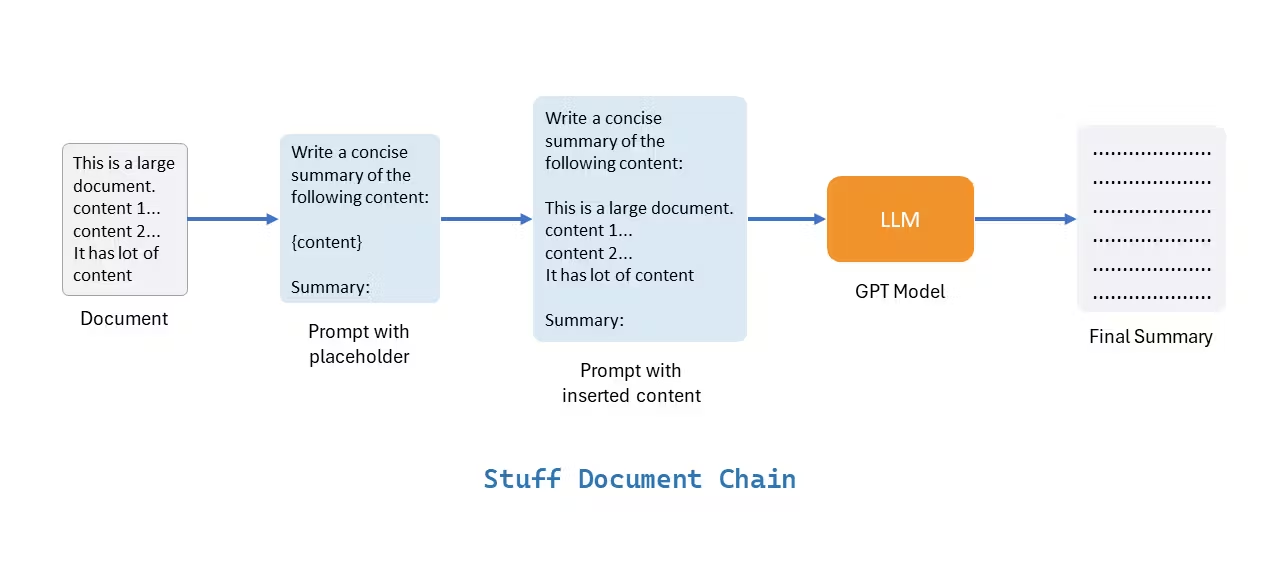

**Pros**:

* Requires only a single call to the LLM.

* Provides the LLM with access to all the data simultaneously.

**Cons**:

* Limitations due to the context length of most LLMs.

* Not suitable for large documents or a high volume of documents as it may result in prompts that exceed the context length.

In [11]:
prompt_template = """Write a concise summary of the following:
"{text}"
CONCISE SUMMARY:"""

In [12]:
prompt = PromptTemplate.from_template(prompt_template)

In [13]:
llm_chain = LLMChain(llm=llm, prompt=prompt)

In [14]:
stuff_chain = StuffDocumentsChain(
    llm_chain=llm_chain, 
    document_variable_name="text"
  )

In [15]:
output_summary = stuff_chain.run(docs)

In [16]:
wrapped_text = textwrap.fill(output_summary, 
                             width=100,
                             break_long_words=False,
                             replace_whitespace=False)
print(wrapped_text)

Artificial intelligence (AI) is the ability of a computer program or machine to think and learn. It
is a field of study that aims to make computers "smart" and capable of working on their own without
being explicitly programmed. The term "intelligence" in AI refers to the ability to act and make
decisions, rather than thinking like a human. AI has applications in various fields such as speech
recognition, strategic game systems, self-driving cars, and data interpretation. Researchers are
working towards creating a general artificial intelligence that can solve multiple problems and even
exhibit creativity and emotions. However, AI also raises concerns about its potential impact on
humanity.


In [17]:
chain = load_summarize_chain(llm, 
                             chain_type="stuff", 
                             prompt=prompt)

# 📌**9. Map Reduce Chain**

The Map Reduce Chain approach is a pragmatic solution for summarization. It's a two-step process that simplifies the task of summarizing a document.

In the first step, known as the "map," the document is divided into smaller, more manageable chunks. Each of these chunks is then summarized individually using the LLMChain, a familiar tool we've seen before.


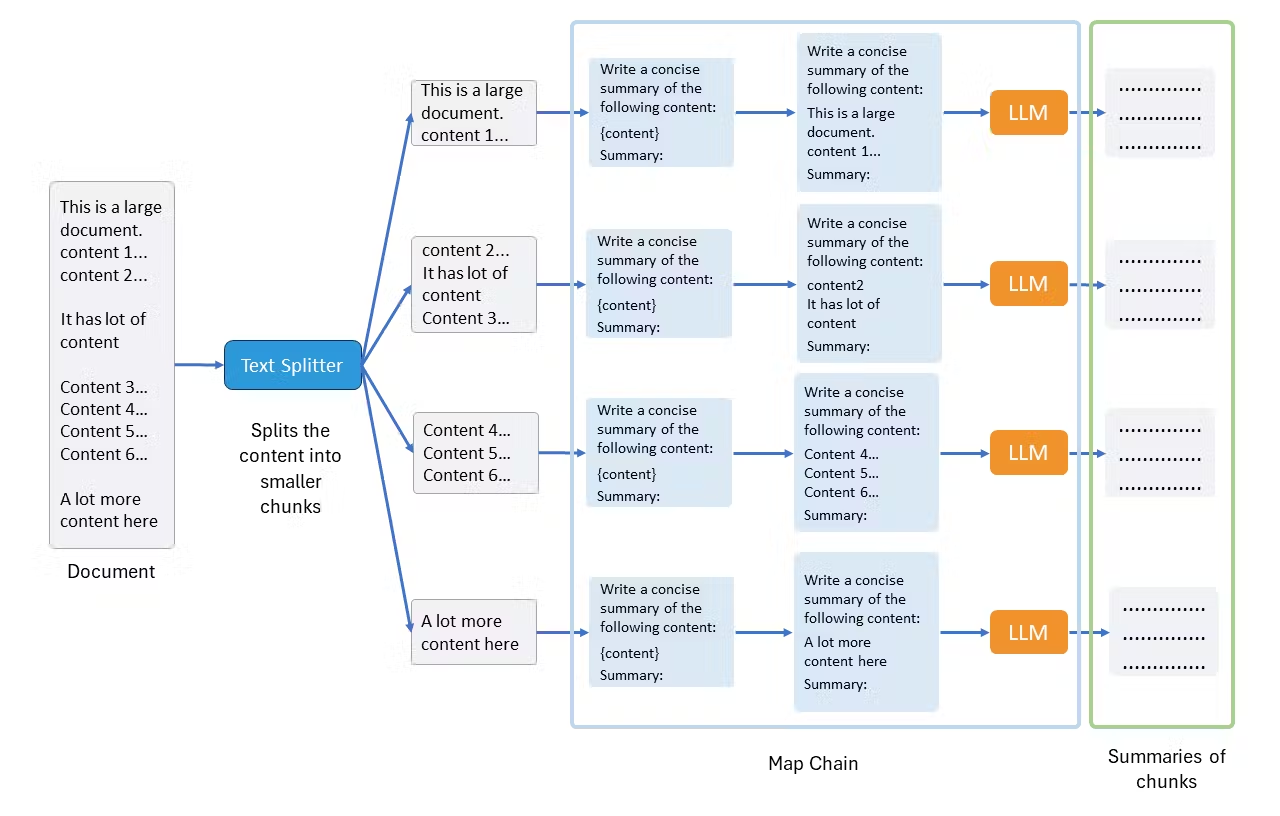

In the second step, referred to as the "reduce," we aim to combine these individual summaries into one cohesive final summary. However, there's a strategic twist. Attempting to merge all the chunk summaries at once might still run into token limit constraints. To address this challenge, the "Reduce Documents Chain" employs a smart iterative approach. It progressively combines chunks, ensuring that the summaries remain within the token limit. In this step, the StuffDocumentsChain, discussed earlier, is once again employed to facilitate the process.

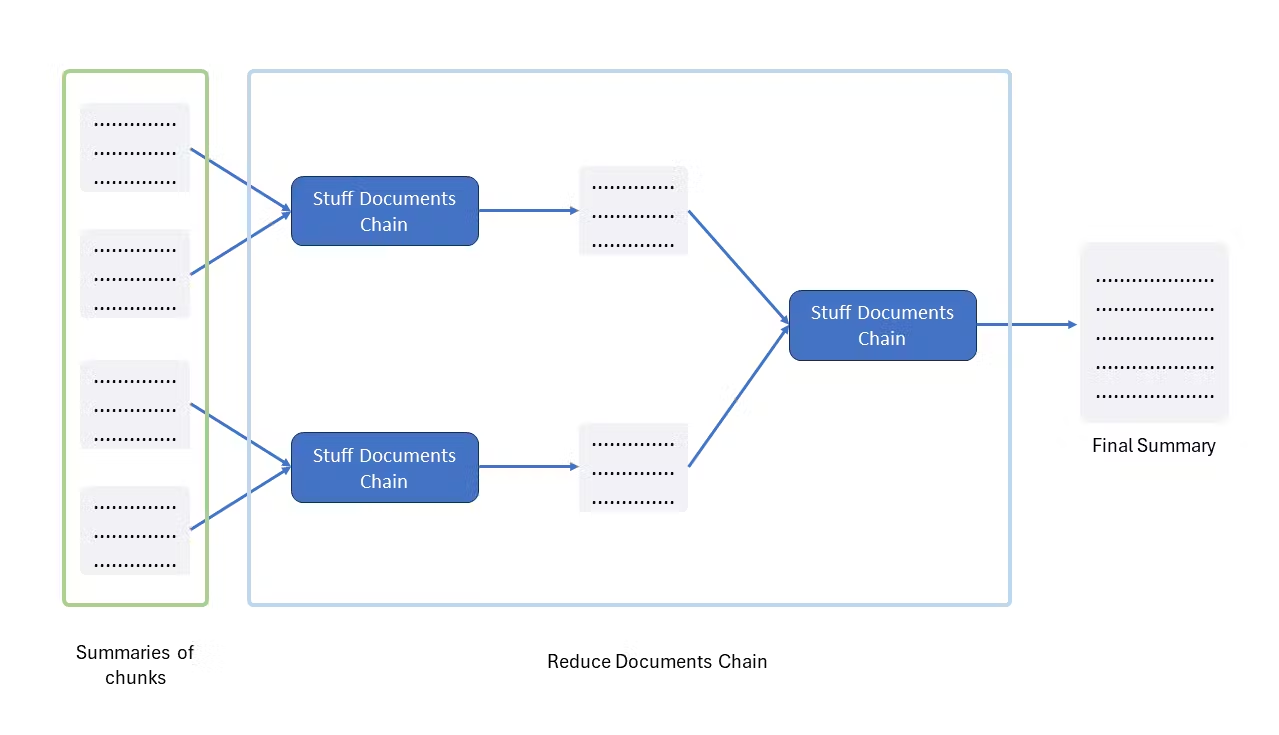

**Map Chain**: This is handled by the LLMChain, summarizing each chunk individually.

**Reduce Documents Chain**: This smart strategy ensures that the summaries of the combined chunks remain within the token limit, gradually producing the final summary.

**Pros**:

* Efficiently divides and summarizes large documents.

* Overcomes token limit constraints by iteratively reducing chunks.

**Cons**:

* Involves multiple iterations, which may impact processing time.


## ⌛**Map Chain**

In [18]:
map_template = """Write a concise summary of the following content:

{text}

Summary:
"""

In [19]:
map_prompt = PromptTemplate.from_template(map_template)

In [20]:
map_chain = LLMChain(prompt=map_prompt, llm=llm)

## ⌛**Reduce Chain**

In [21]:
reduce_template = """The following is set of summaries:

{doc_summaries}

Summarize the above summaries with all the key details
Summary:"""

In [22]:
reduce_prompt = PromptTemplate.from_template(reduce_template)

In [23]:
reduce_chain = LLMChain(llm=llm, prompt=reduce_prompt)

In [24]:
stuff_chain = StuffDocumentsChain(llm_chain=reduce_chain, 
                                  document_variable_name="doc_summaries")

In [25]:
reduce_chain = ReduceDocumentsChain(
    combine_documents_chain=stuff_chain
)

## ⌛**Map Reduce Chain**

In [26]:
map_reduce_chain = MapReduceDocumentsChain(
    llm_chain=map_chain,
    document_variable_name="text",
    reduce_documents_chain=reduce_chain)

In [27]:
output = map_reduce_chain.run(docs)

In [28]:
wrapped_text = textwrap.fill(output, 
                             width=100,
                             break_long_words=False,
                             replace_whitespace=False)
print(wrapped_text)

Artificial intelligence (AI) is a field of computer science that focuses on creating intelligent
machines capable of tasks that typically require human intelligence. It is used in various
industries and has the potential to greatly impact society. The term "intelligence" is debated in
AI, with different perspectives on whether it should be defined in terms of action or thinking. AI
involves computer programs that mimic human cognition and can learn, solve problems, and think
logically. It is a multidisciplinary field that encompasses various disciplines. AI research began
in 1956 but experienced a decline known as the "AI winter" before resurging in the 90s and early
2000s. Notable achievements include machines defeating human champions in chess and Jeopardy! AI has
become popular worldwide due to advancements in technology and access to more data. The content also
includes references to various topics and sources discussing AI.


# 📌**10. Summarization With 'Refine' Chain**

The 'refine' chain introduces a nuanced approach to summarization. It begins with an initial prompt on the first chunk of data, which generates an initial output. As the process continues through the remaining documents, this output is passed along with the next document, prompting the Large Language Model (LLM) to refine the output based on the new document.

The 'refine documents chain' constructs a response by iteratively cycling through the input documents and progressively updating its answer. For each document, it conveys all non-document inputs, the current document, and the most recent intermediate answer to an LLM chain, thereby obtaining a fresh answer.

**Pros**:

* Has the potential to incorporate more relevant context, potentially resulting in less loss of information compared to MapReduceDocumentsChain.

**Cons**:

* Involves a larger number of LLM calls compared to StuffDocumentsChain.

* These calls are not independent and cannot be parallelized like in MapReduceDocumentsChain.

* Potential dependencies on the order of the documents may exist, impacting the summarization process.

In [29]:
chain = load_summarize_chain(llm, chain_type="refine")
chain.run(docs)

'Artificial intelligence (AI) is the ability of a computer program or machine to think and learn, mimicking human cognition. It involves the interpretation of external data, learning from it, and using those learnings to achieve specific goals and tasks through flexible adaptation. The goal of AI is to create a flexible agent that can perceive its environment and take actions to maximize its chance of success. AI involves many different fields like computer science, mathematics, linguistics, psychology, neuroscience, and philosophy. While the extreme goal of AI research is to create computer programs that can learn, solve problems, and think logically, in practice, most applications focus on tasks that computers can do well, such as searching databases and performing calculations. The ability for AI to truly perceive its environment is currently beyond the capabilities of present-day computing. Researchers are also exploring the creation of a "general artificial intelligence" that can 

Additionally, it's worth noting that Langchain offers the flexibility to provide a prompt and obtain intermediate steps in the summarization process. This feature enables a more detailed understanding of how the summarization is being generated, making it a valuable tool for transparency and fine-tuning the summarization outcomes.

In [30]:
prompt_template = """Write a concise summary of the following extracting the key information:

{text}

CONCISE SUMMARY:"""

In [31]:
prompt = PromptTemplate(template=prompt_template, 
                        input_variables=["text"])

In [32]:
refine_template = (
    "Your job is to produce a final summary\n"
    "We have provided an existing summary up to a certain point: {existing_answer}\n"
    "We have the opportunity to refine the existing summary"
    "(only if needed) with some more context below.\n"
    "------------\n"
    "{text}\n"
    "------------\n"
    "Given the new context, refine the original summary"
    "If the context isn't useful, return the original summary."
)

In [33]:
refine_prompt = PromptTemplate(
    input_variables=["existing_answer", "text"],
    template=refine_template,
)

In [34]:
chain = load_summarize_chain(OpenAI(temperature=0), 
                             chain_type="refine", 
                             return_intermediate_steps=True, 
                             question_prompt=prompt, 
                             refine_prompt=refine_prompt)

In [35]:
output_summary = chain({"input_documents": docs}, return_only_outputs=True)

In [36]:
wrapped_text = textwrap.fill(output_summary['output_text'], 
                             width=100,
                             break_long_words=False,
                             replace_whitespace=False)
print(wrapped_text)



Artificial intelligence (AI) is a field of study that focuses on creating machines that can think
and act like humans. It was first coined by John McCarthy in 1955 and is related to other fields
such as robotics, natural language processing, and machine learning. AI involves many different
fields like computer science, mathematics, linguistics, psychology, neuroscience, and philosophy. AI
is used in many areas, including healthcare, finance, and transportation, and is spoken in many
languages. The term intelligence is misleading, as Alan Turing wrote in 1950 that the question
should be changed from whether a machine "thinks" to "whether or not it is possible for machinery to
show intelligent behaviour". Turing also created the Turing test, which is a general test to
determine if a machine is intelligent. AI founders John McCarthy and Russell and Norvig agree that
AI must be defined in terms of "acting" and not "thinking", and that the Turing test should not
compare machines to people

# 📝**11. Conclusion**

In conclusion, this tutorial has unveiled a spectrum of innovative approaches and techniques in the field of Natural Language Processing (NLP) and document summarization. We've explored how Langchain, a groundbreaking tool, transforms the complex task of summarizing extensive or multiple documents into a more manageable and efficient process.

We delved into various chains within Langchain, each offering a distinct strategy for summarization. From the 'Map Reduce Chain' that intelligently divides and summarizes documents to the 'Refine Chain' that iteratively refines answers, these methods provide flexible solutions for handling diverse document summarization challenges.

The 'Stuff Chain' simplifies the process with a straightforward approach, while the 'Map Reduce Chain' strategically divides and conquers large documents. The 'Refine Chain' introduces a nuanced iterative approach, pulling in relevant context for potentially more precise summaries.

Throughout this tutorial, we've witnessed the power and flexibility of Langchain in addressing the complexities of document summarization. The ability to adapt and choose the most suitable chain for the task at hand is a testament to the versatile capabilities of this tool.

As the world of NLP and document summarization continues to evolve, Langchain stands as a valuable resource, empowering practitioners to tackle even the most challenging document summarization tasks with finesse and efficiency. The diverse methods and chains explored here underscore the versatility and potential of Langchain in simplifying the complexities of document processing.